# Year 2023 Day 08

[--- Day 8: Haunted Wasteland ---](https://adventofcode.com/2023/day/8)


In [1]:
import numpy as np
from graphviz import Digraph  # pyright: ignore[reportMissingTypeStubs]

from advent_of_code.common.common import get_example_inputs_file_contents
from advent_of_code.y_2023.problem_202308 import (
    AdventOfCodeProblem202308,
    Network,
    detect_loop,
)

In [2]:
problem = AdventOfCodeProblem202308()
problem

AdventOfCodeProblem202308(year=2023, day=8)

In [3]:
example_inputs = get_example_inputs_file_contents(2023)["test_problem_202308"]
list(example_inputs.keys())

['EXAMPLE_INPUT_1', 'EXAMPLE_INPUT_2', 'EXAMPLE_INPUT_PART_2']

In [4]:
source_end_letter = "A"
target_end_letter = "Z"

## With Example Input


In [5]:
example_input_part_2 = problem.parse_text_input(example_inputs["EXAMPLE_INPUT_PART_2"])

Simplified version of the problem solving code, focusing on gathering the history (logging) for latter visualization.


In [6]:
def find_loops(network: Network):
    sources = tuple(
        sorted(key for key in network.nodes.keys() if key.endswith(source_end_letter))
    )
    histories: dict[str, list[tuple[str, int]]] = {}
    for source_node in sources:
        histories[source_node] = detect_loop(network, source_node, target_end_letter)

    # Find lowest common multiple for all loop lengths
    steps = np.lcm.reduce([len(h) for h in histories.values()])

    return steps, histories

Converts the problem solving code's history to a Dot graph.


In [7]:
def dot_graph(
    histories: dict[str, list[tuple[str, int]]], target_end_letter: str = "Z"
):
    dot = Digraph()

    for history in histories.values():
        previous_node = history[0][0]
        fillcolor = "#ffccff"  # magenta = starting node
        dot.node(f"{previous_node}", style="filled", fillcolor=fillcolor)

        for current_node, _ in history[1:]:
            fillcolor = "white"
            if current_node.endswith(target_end_letter):
                fillcolor = "#ccffff"  # cyan = end node
            dot.node(f"{current_node}", style="filled", fillcolor=fillcolor)
            dot.edge(previous_node, current_node)
            previous_node = current_node

    return dot

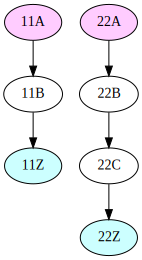

In [8]:
_, histories = find_loops(example_input_part_2)
dot_graph(histories)

## With Actual Input

Visualize the graph created by walking the actual problem's input graph.


In [9]:
_, histories = find_loops(problem.parse_input_text_file())

In [10]:
lengths = {k: len(v[:-1]) for    k, v in histories.items()}
print(f"{len(histories)} paths starting from: {histories.keys()}")
print(f"Average path length: {int(np.mean(np.array(list(lengths.values()))))}")

6 paths starting from: dict_keys(['AAA', 'MHA', 'NBA', 'TTA', 'VVA', 'XSA'])
Average path length: 16229


The paths are too long to be visualized with graphviz!
